```bash
python -m carps.analysis.gather_data runs_eval --n_processes 1
```
or when concatenating other people's logs:
```bash
make gather-data
```

In [4]:
from carps.analysis.generate_report import load_results
from carps.analysis.gather_data import normalize_logs
import pandas as pd
from pathlib import Path
from carps.analysis.utils import filter_only_final_performance
from carps.analysis.gather_data import filelogs_to_df, get_interpolated_performance_df
from adaptaf.utils import postprocess_benchmarks, RWBM

df_final_fn = "eval_final_perf.parquet"

In [ ]:

import importlib
import adaptaf.utils as au
importlib.reload(au)
from adaptaf.utils import postprocess_benchmarks
import numpy as np

def merge_logs(logs_list, logs_cfg_list, outdir):
    offsets = [len(l) for l in logs_cfg_list]
    offsets = np.concatenate((np.array([0]), np.cumsum(offsets)))

    for i in range(len(logs_cfg_list)):
        logs_cfg_list[i]["experiment_id"] += offsets[i]
        logs_list[i]["experiment_id"] += offsets[i]

    logs = pd.concat(logs_list)
    logs_cfg = pd.concat(logs_cfg_list)

    # print(logs["optimizer_id"].unique())

    assert len(logs_cfg), logs_cfg["experiment_id"].nunique()

    logs.to_parquet(Path(outdir) / "logs.parquet")
    logs_cfg.to_parquet(Path(outdir) / "logs_cfg.parquet")
    return logs, logs_cfg

# eval_run_dir = Path("../runs_eval")
# filelogs_to_df(rundir=[eval_run_dir], n_processes=1)
reference_perf_dir = Path("../reference_performance")
result_dir1 = Path("../results_alphanet2")
result_dir2 = Path("../results")
merge_dir = Path("../resultsmerged")
merge_dir.mkdir(exist_ok=True, parents=True)

# Load and merge
logs_eval1 = load_results(result_dir1 / "logs.parquet")
# logs_eval2 = load_results(result_dir2 / "logs.parquet")
# logs_ref = load_results(reference_perf_dir / "logs.parquet")
logs_cfg_eval1 = pd.read_parquet(result_dir1 / "logs_cfg.parquet")
# logs_cfg_eval2 = pd.read_parquet(result_dir2 / "logs_cfg.parquet")
# logs_cfg_ref = pd.read_parquet(reference_perf_dir / "logs_cfg.parquet")
# logs_list = [logs_eval1, logs_eval2, logs_ref]
# logs_cfg_list = [logs_cfg_eval1, logs_cfg_eval2, logs_cfg_ref]
# logs_list = [logs_eval1]
# logs_cfg_list = [logs_cfg_eval1]
# logs, logs_cfg = merge_logs(logs_list=logs_list, logs_cfg_list=logs_cfg_list, outdir=merge_dir)
# logs = pd.concat([logs_eval, logs_ref]).reset_index(drop=True)
logs = logs_eval1
logs_cfg = logs_cfg_eval1
assert logs["experiment_id"].nunique() == len(logs_cfg)
logs = normalize_logs(logs)

logs.loc[logs["benchmark_id"] == "BNNBO", "benchmark_id"] = RWBM  # fix legacy naming
logs = postprocess_benchmarks(logs, logs_cfg)
logs.to_parquet("logs.parquet")
logs_cfg.to_parquet("logs_cfg.parquet")
df_final = filter_only_final_performance(logs)
df_final.to_parquet(df_final_fn, index=False)

[14:08:22] INFO     Loading results from ../results_alphanet2/logs.parquet                  ]8;id=15263;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=425054;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1099\1099]8;;\

[14:08:24] INFO     Preprocessing results                                                   ]8;id=359965;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=131596;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1103\1103]8;;\

           INFO     Columns: Index(['task_id', 'optimizer_id', 'seed', 'level_3',           ]8;id=870488;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=580328;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1104\1104]8;;\
                    'n_trials',                                                                                    
                           'n_function_calls', 'trial_info__config',                                               
                    'trial_info__instance',                                                                        
                           'trial_info__seed', 'trial_info__budget',                                               
                           'trial_info__normalized_budget', 'trial_info__name',                                    
                           'trial_info__checkpoint', 'trial_info__cutoff',                                         
                    'trial_value__cost',                                                                           
                           'trial_value__time', 'trial_value__virtual_time',                                       
                    'trial_value__status',                                                                         
                           'trial_value__starttime', 'trial_value__endtime',                                       
                    'benchmark_id',                                                                                
                           'task.optimization_resources.n_trials', 'trial_value__cost_raw',                        
                           'trial_value__cost_inc', 'task_type', 'time', 'experiment_id'],                         
                          dtype='object')                                                                          

           INFO     ...normalizing                                                          ]8;id=934584;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py\generate_report.py]8;;\:]8;id=746271;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/generate_report.py#1110\1110]8;;\

           INFO     Start normalization...                                                       ]8;id=62757;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=964368;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#611\611]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=466031;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=260986;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#612\612]8;;\

[14:08:25] INFO     Normalize cost...                                                            ]8;id=168347;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=629238;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#614\614]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=535464;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=386238;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#630\630]8;;\

[14:08:28] INFO     Normalize time...                                                            ]8;id=650347;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=779996;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#650\650]8;;\

[14:08:30] INFO     Done.                                                                        ]8;id=74727;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=607291;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/CARP-S/carps/analysis/gather_data.py#653\653]8;;\

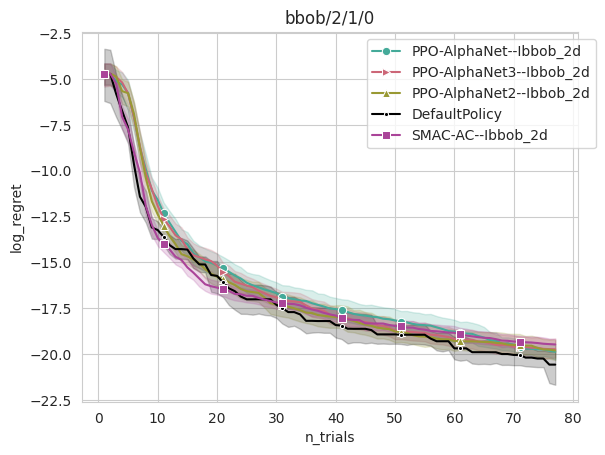

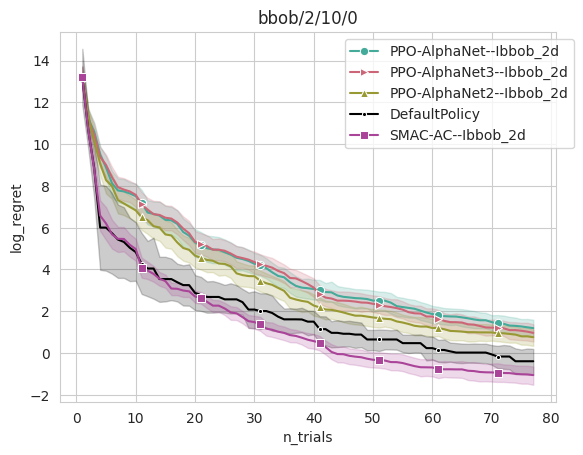

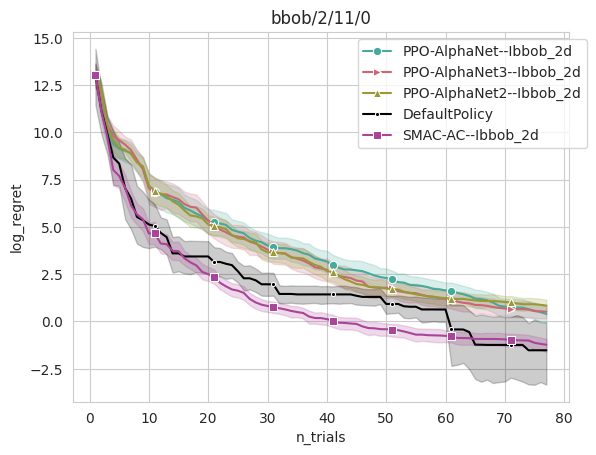

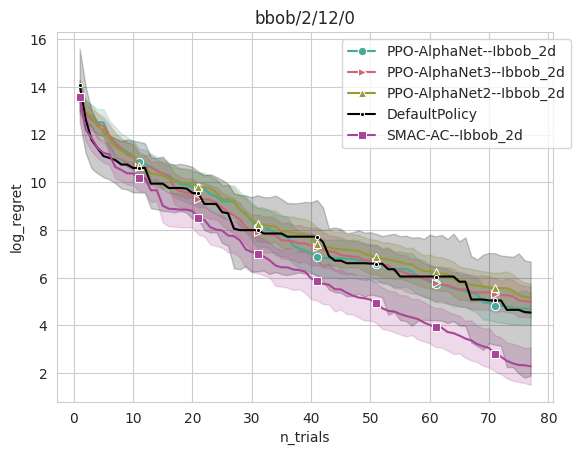

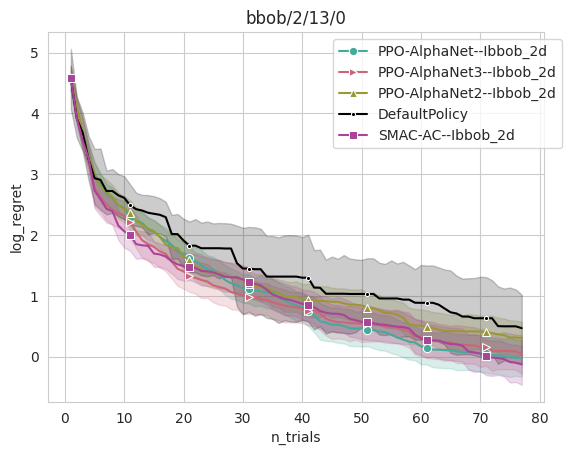

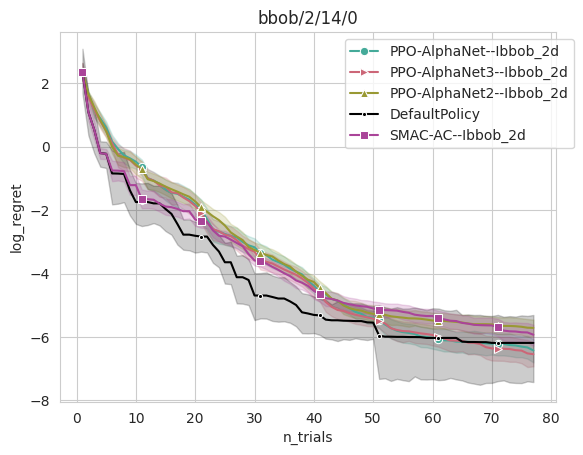

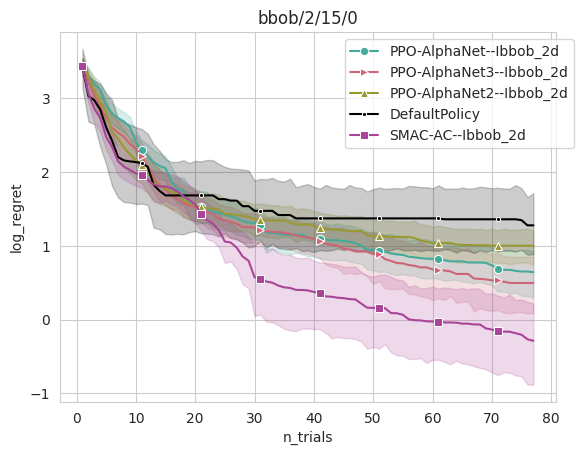

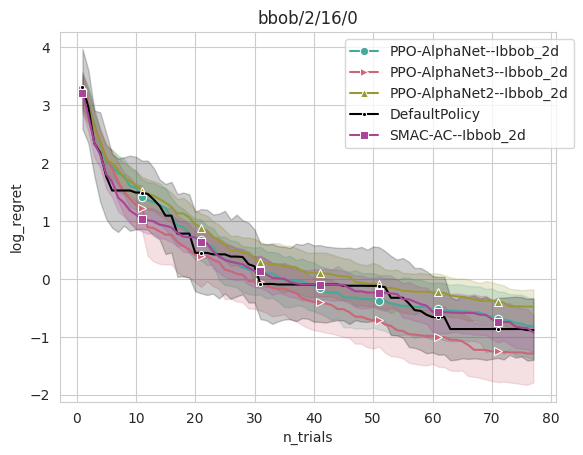

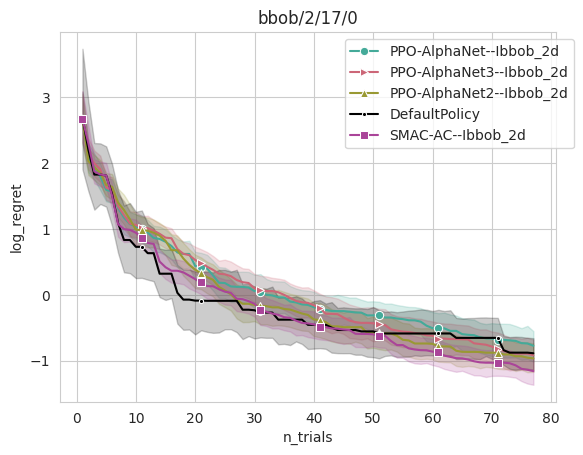

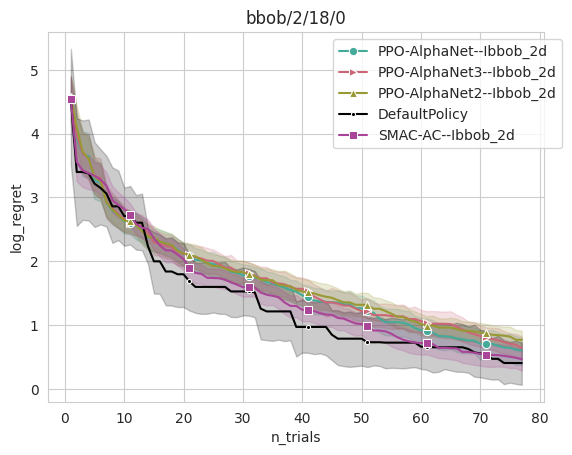

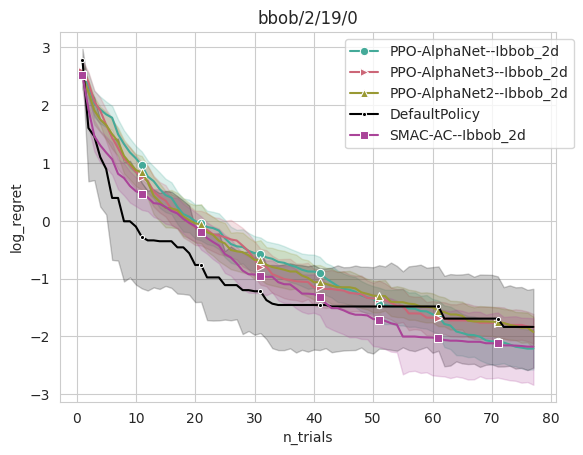

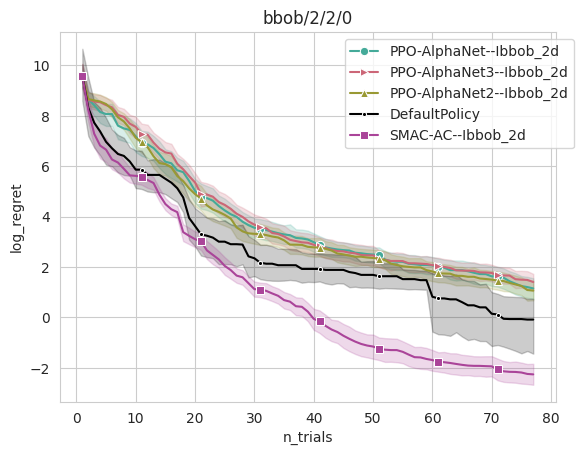

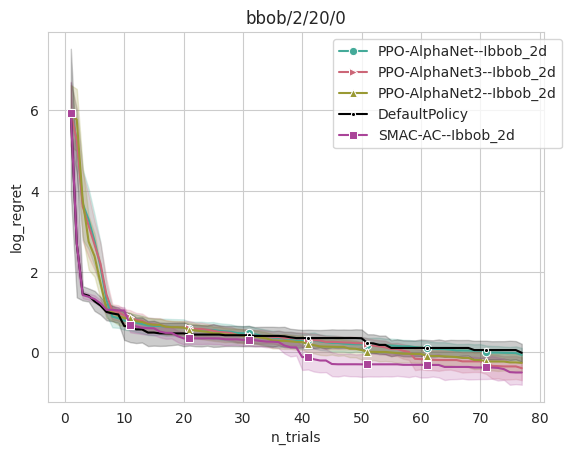

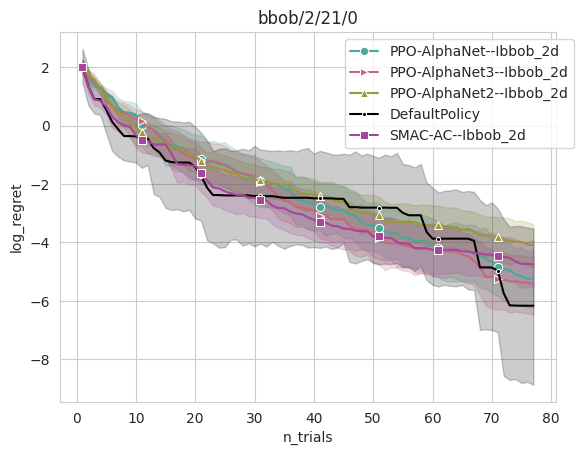

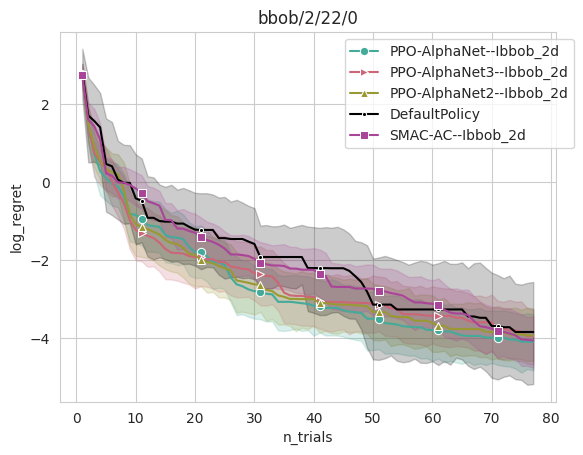

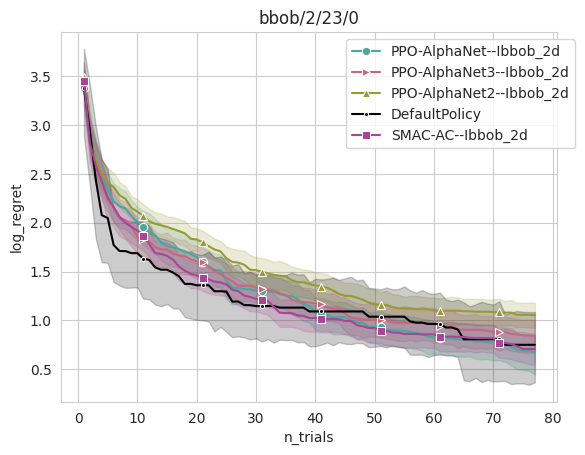

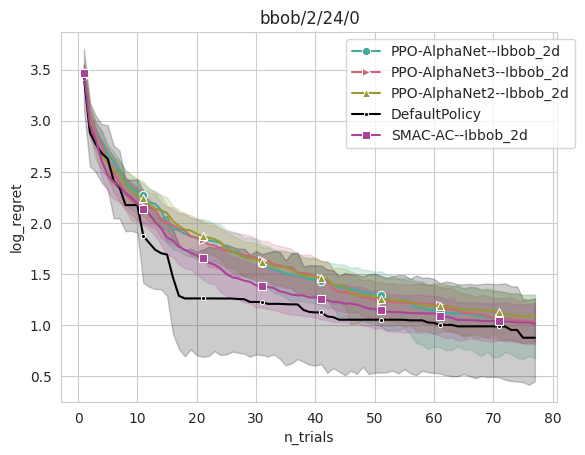

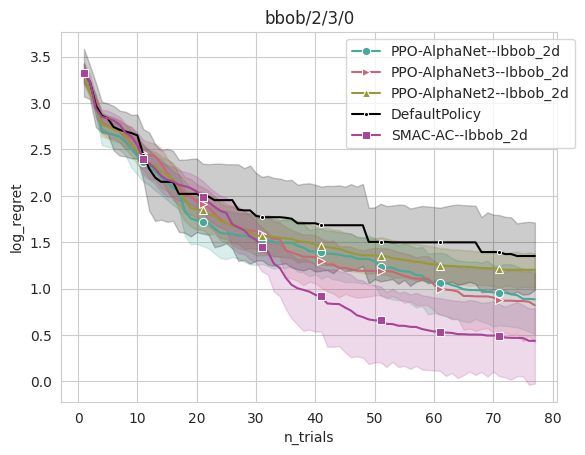

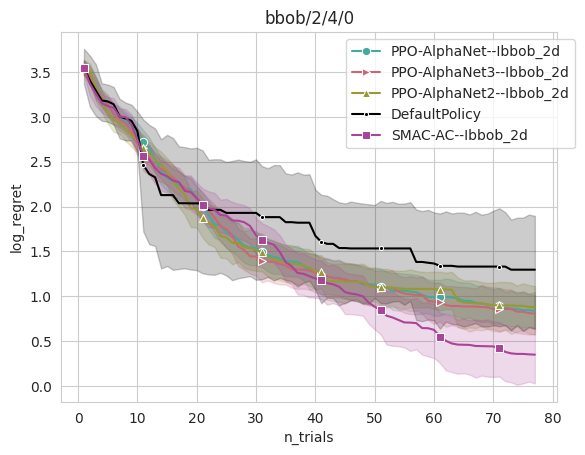

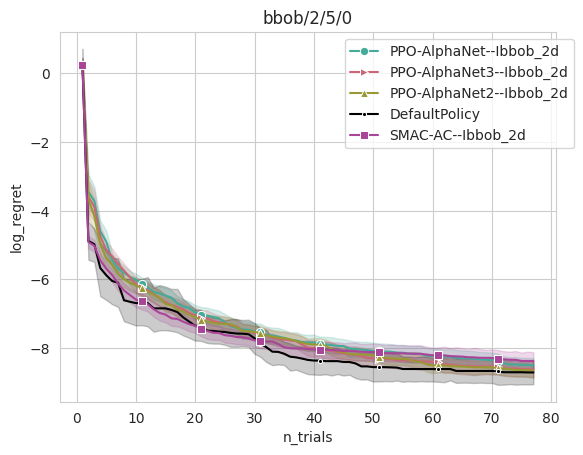

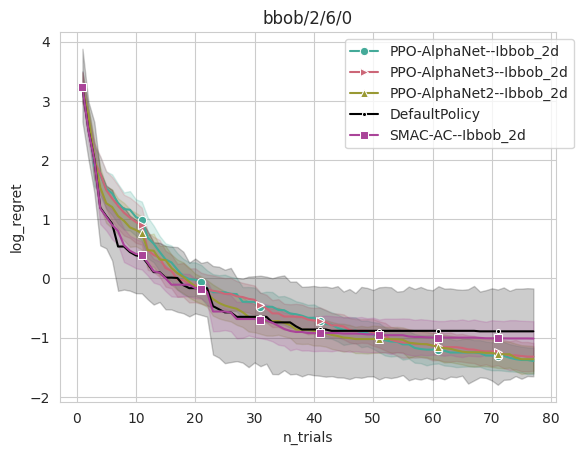

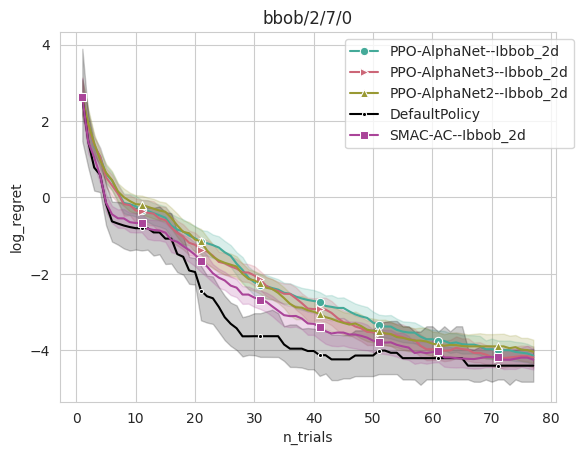

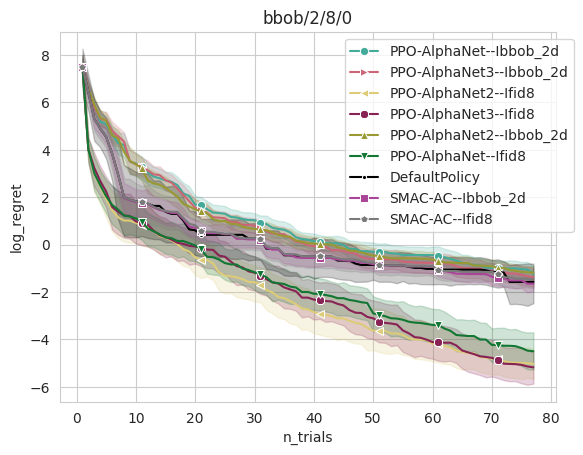

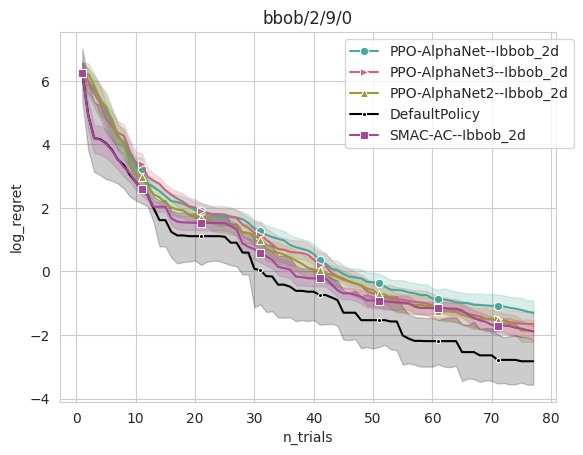

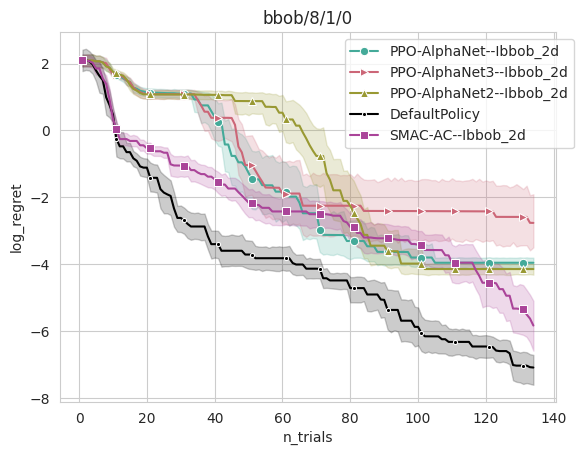

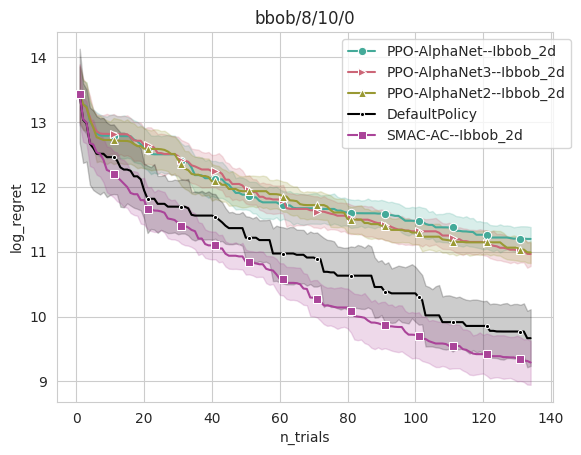

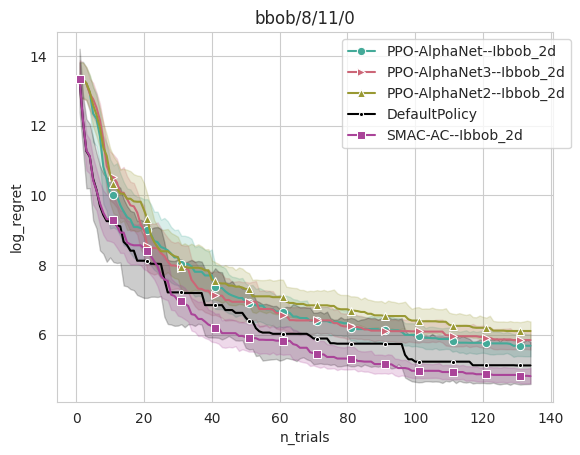

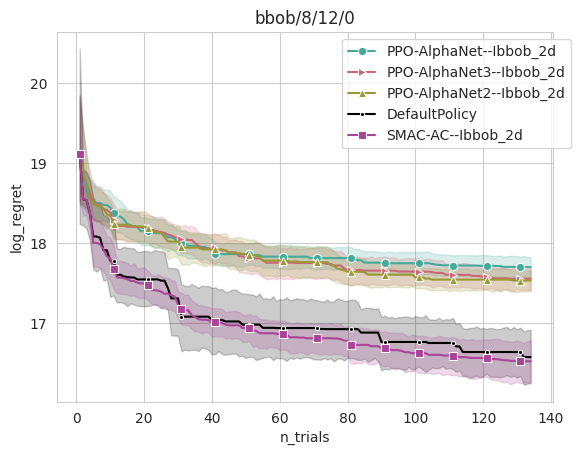

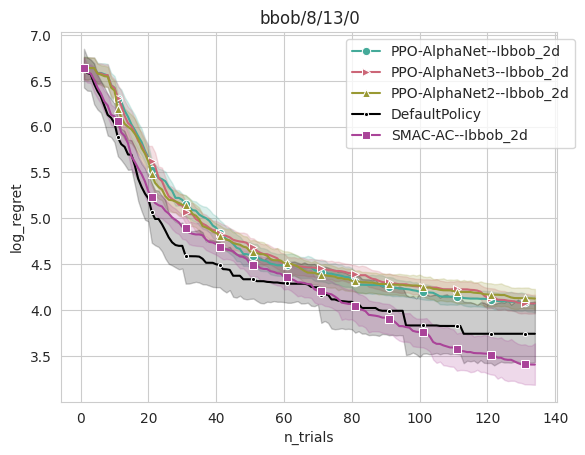

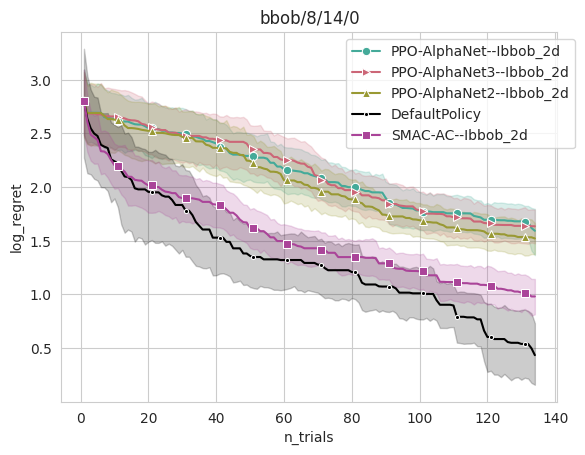

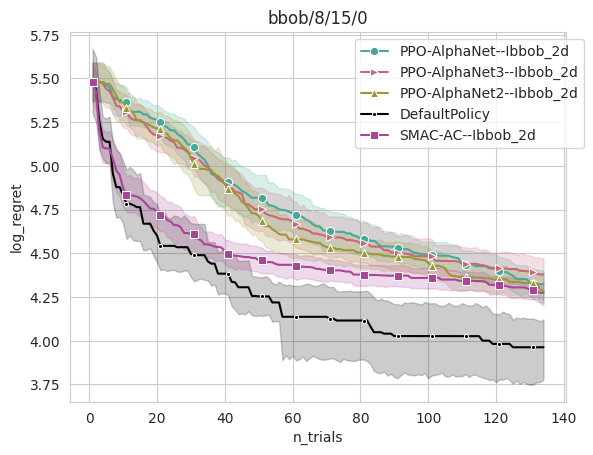

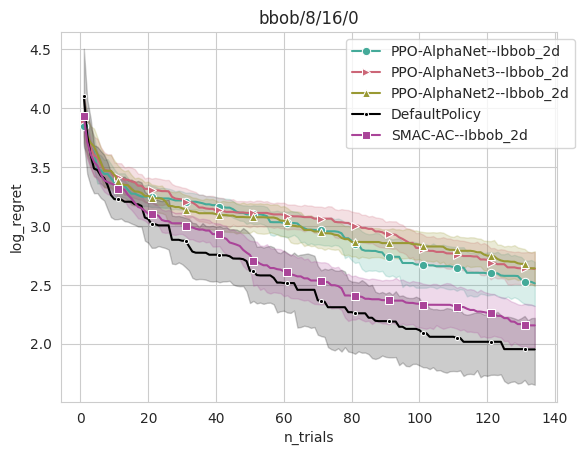

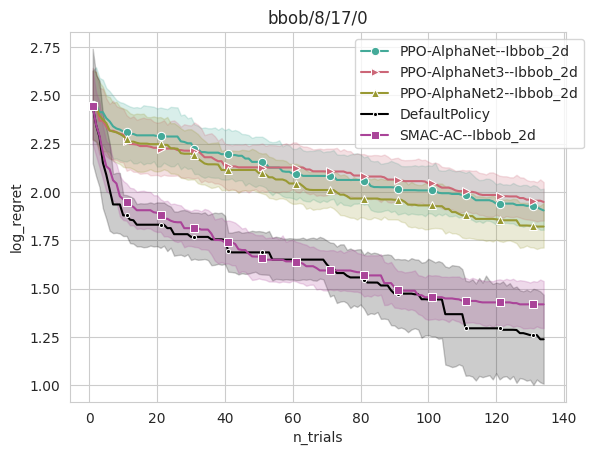

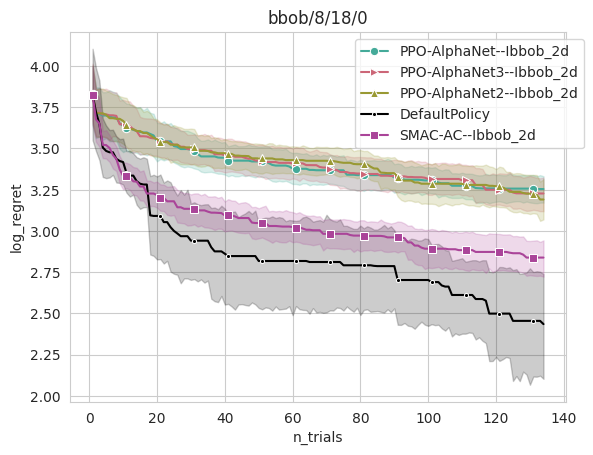

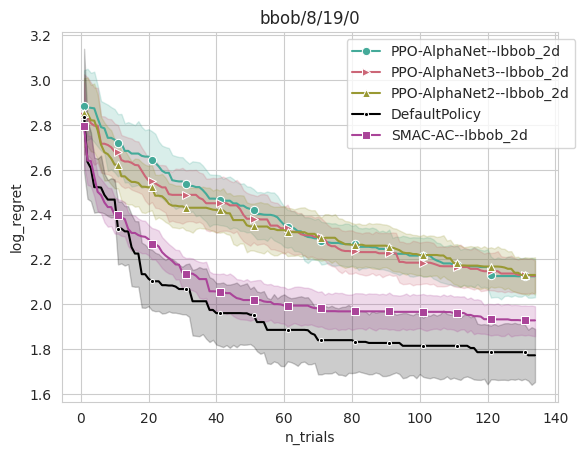

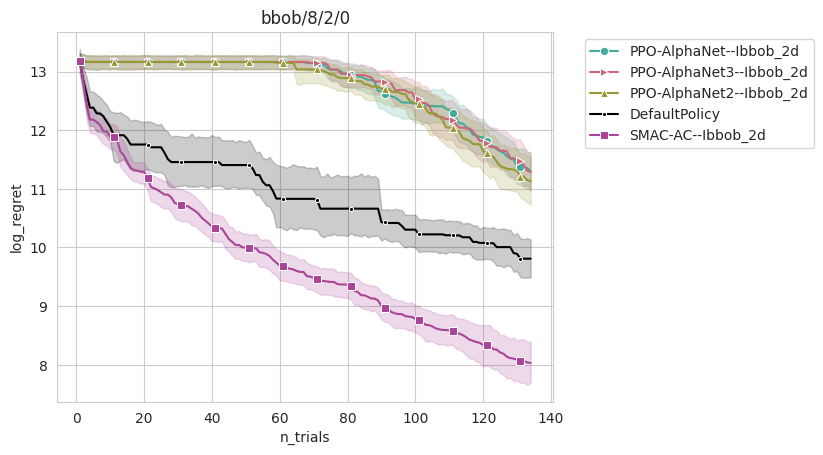

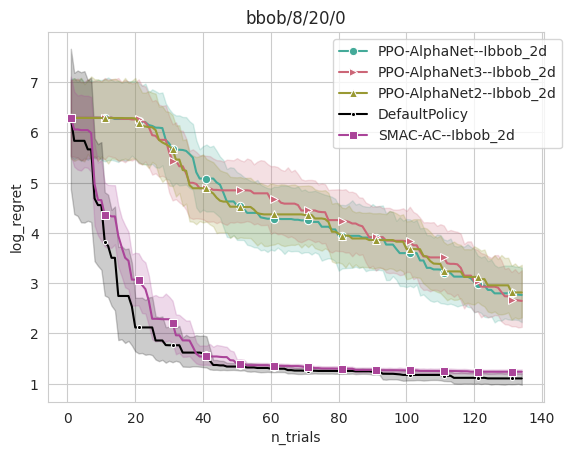

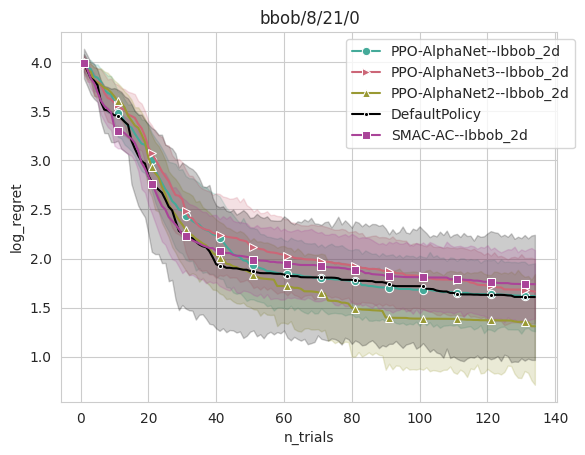

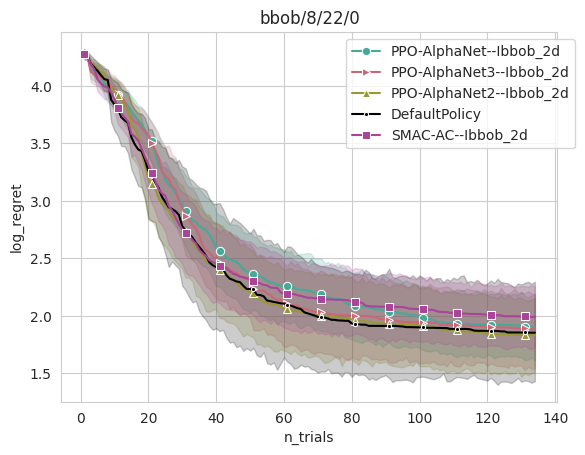

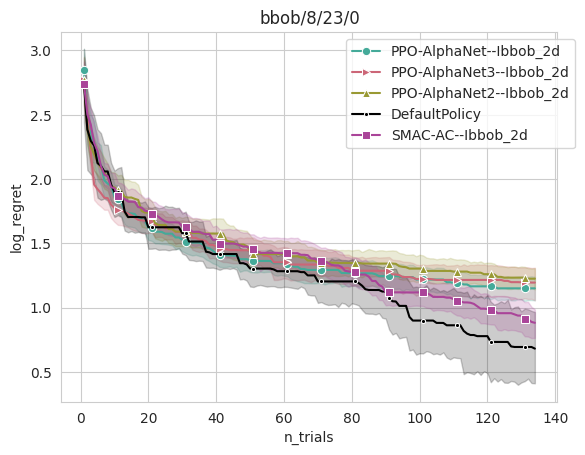

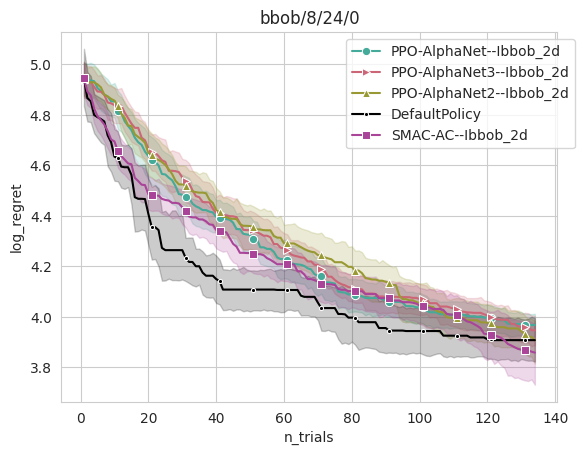

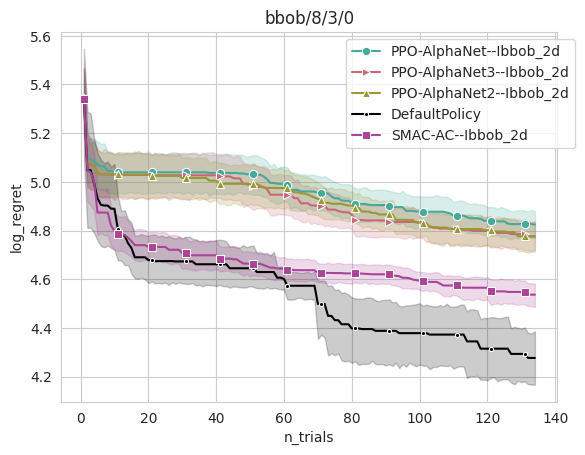

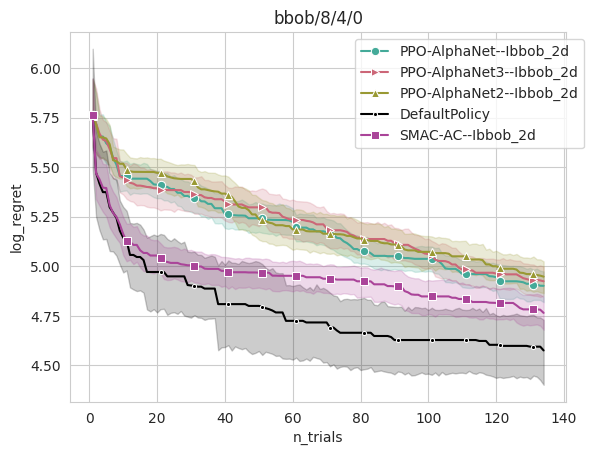

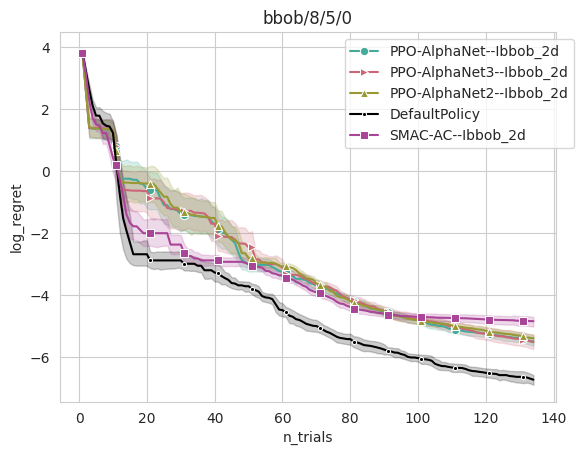

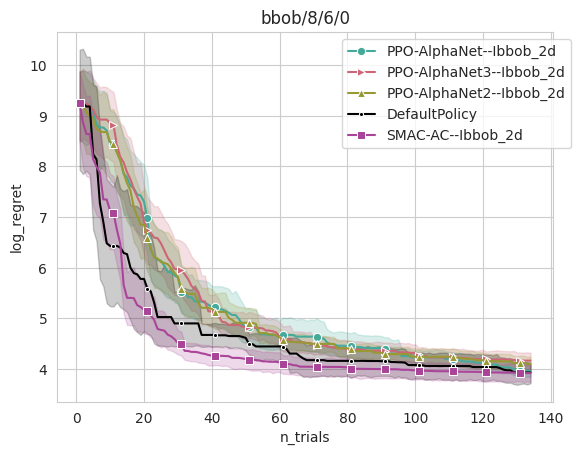

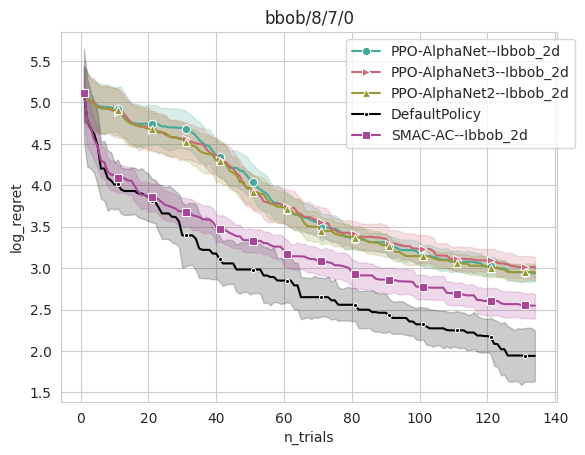

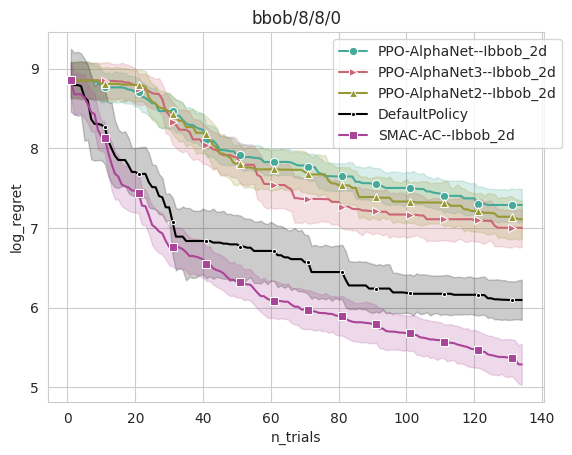

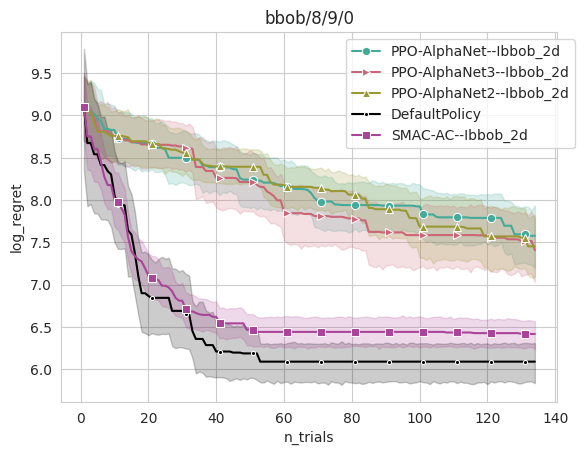

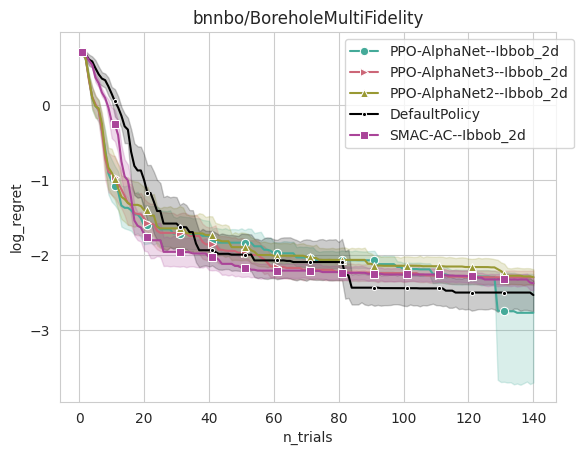

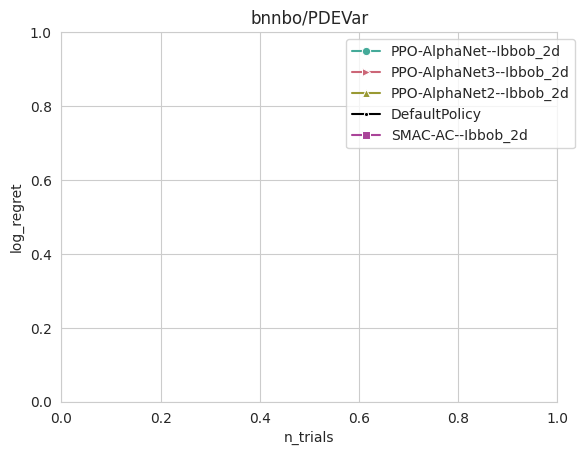

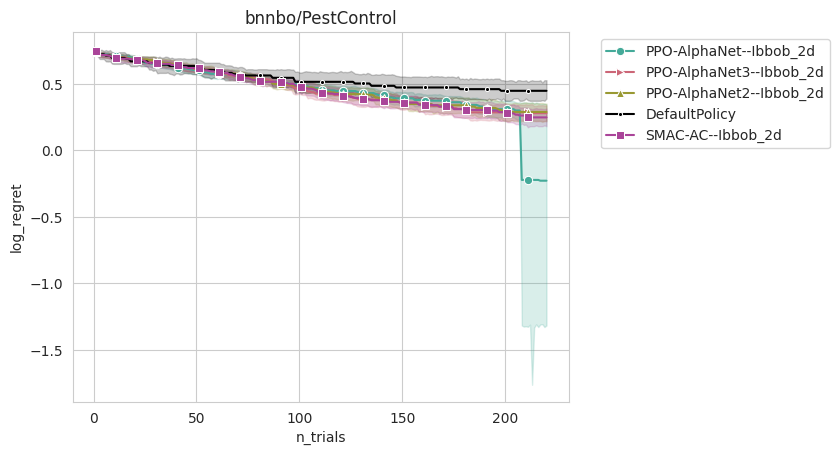

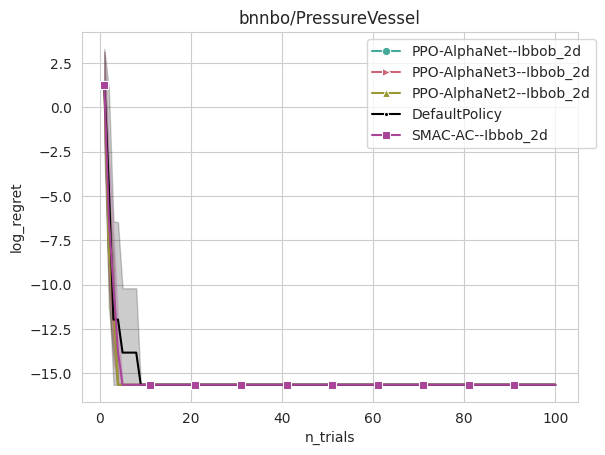

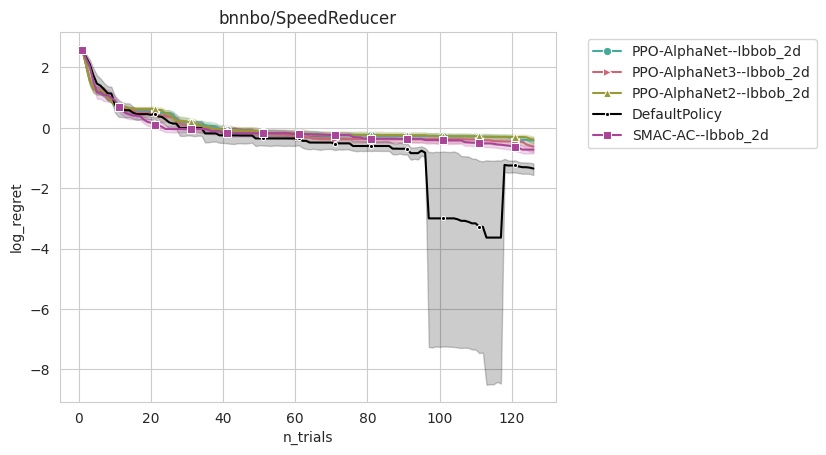

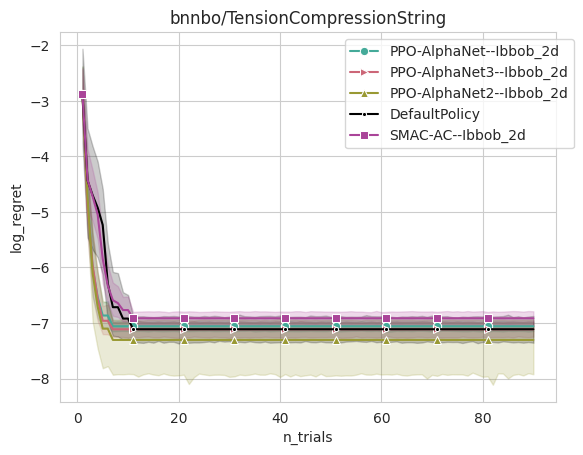

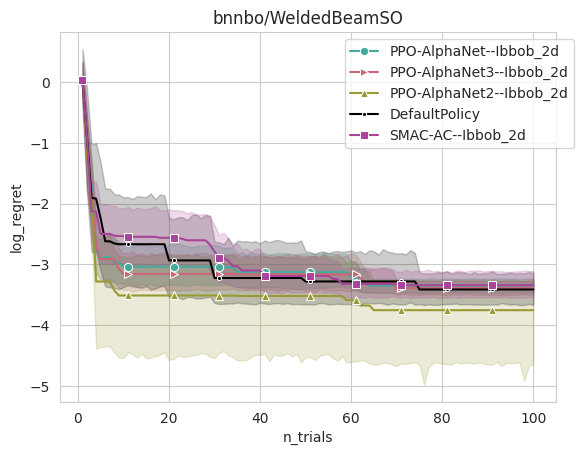

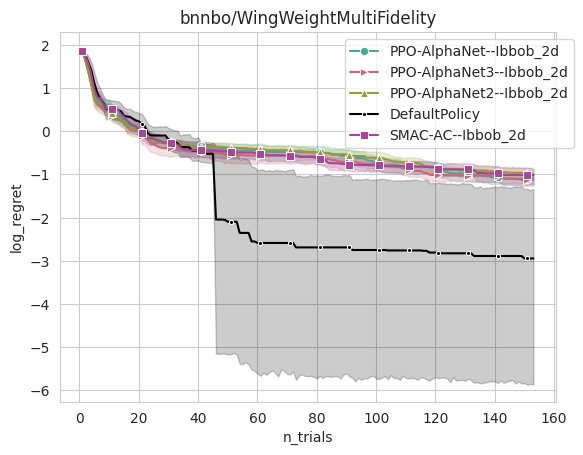

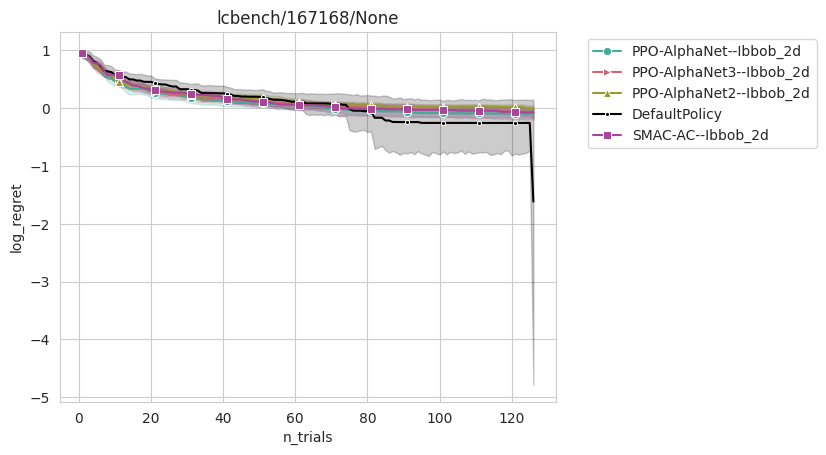

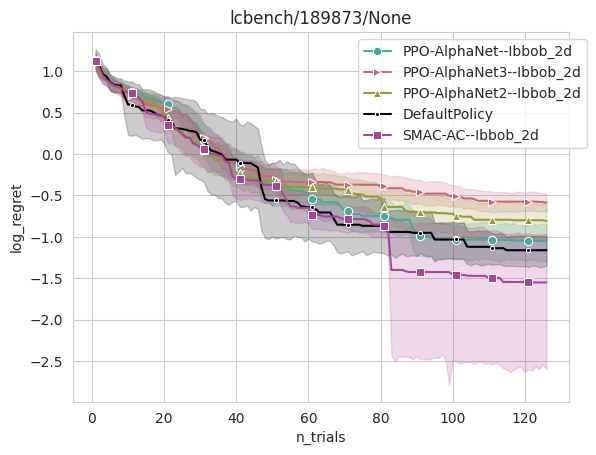

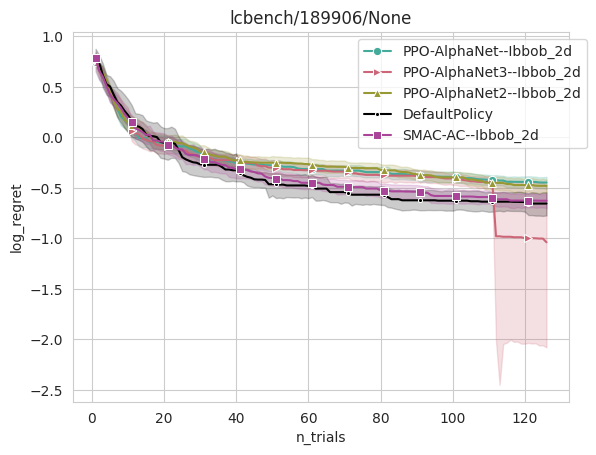

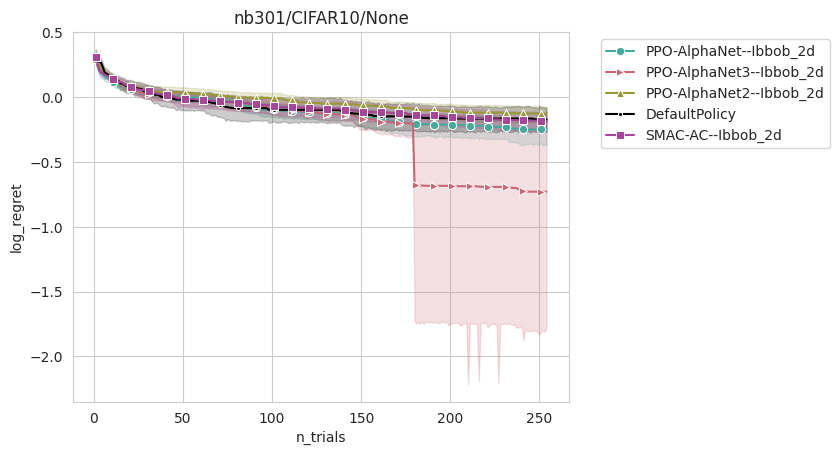

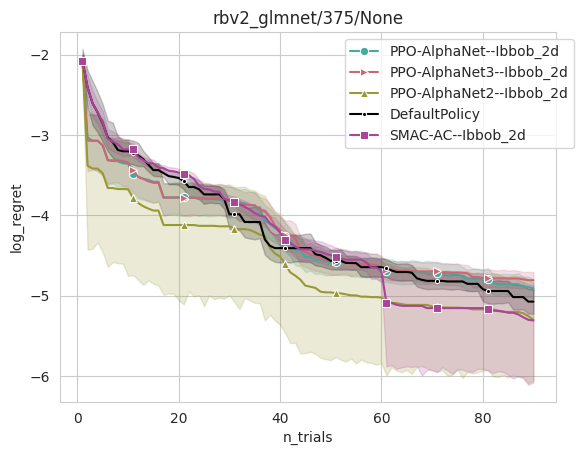

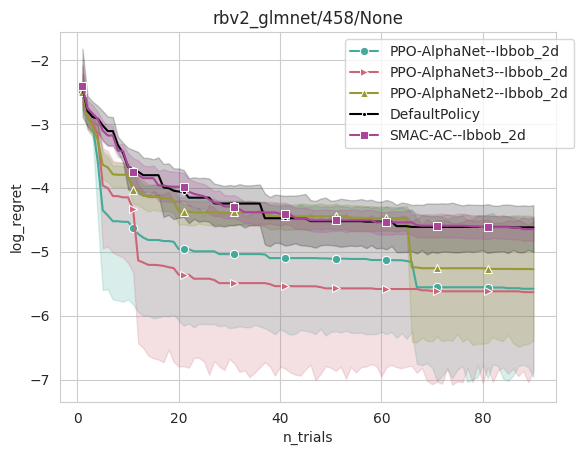

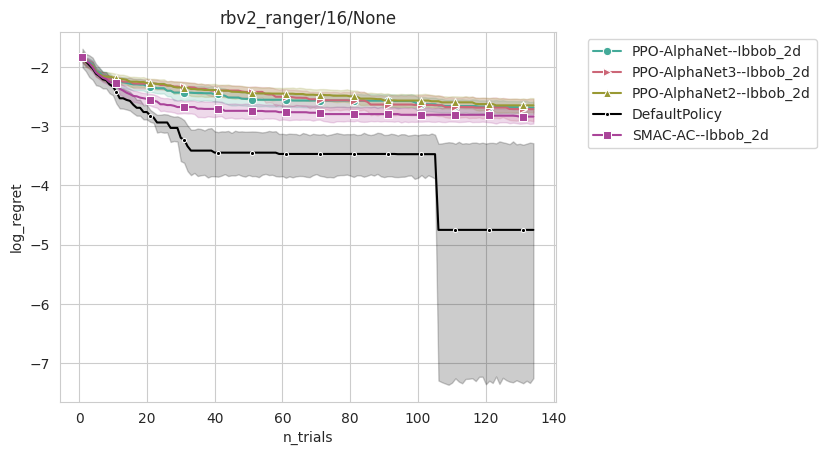

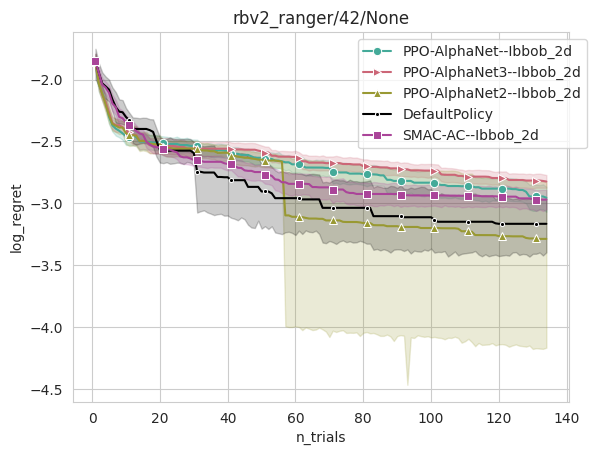

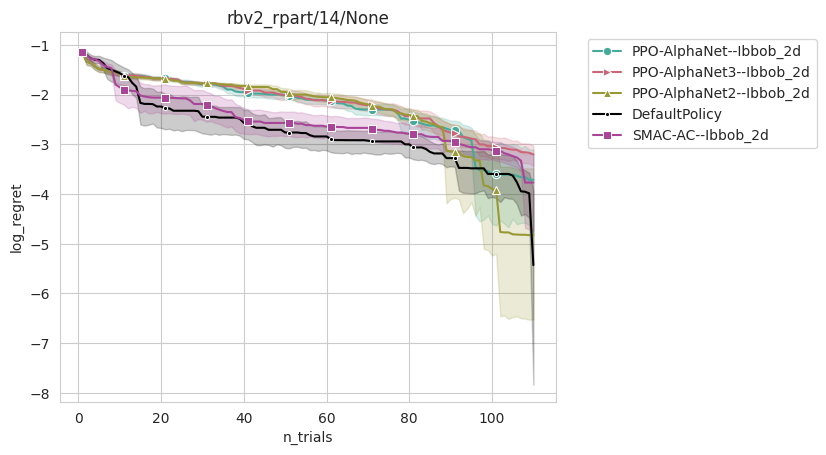

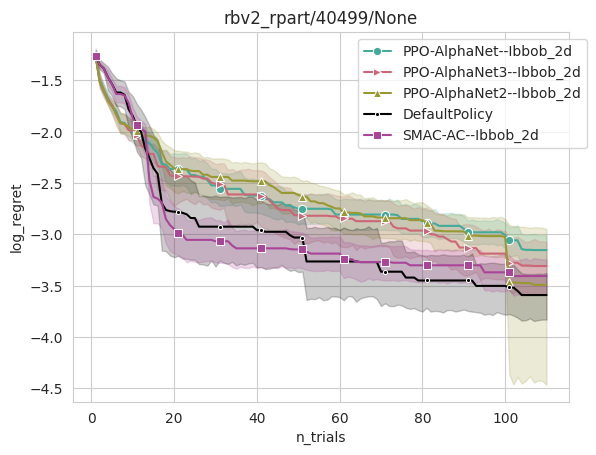

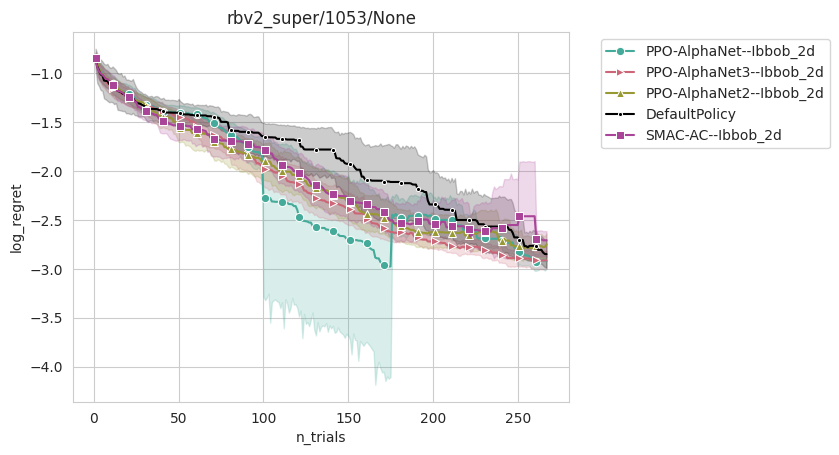

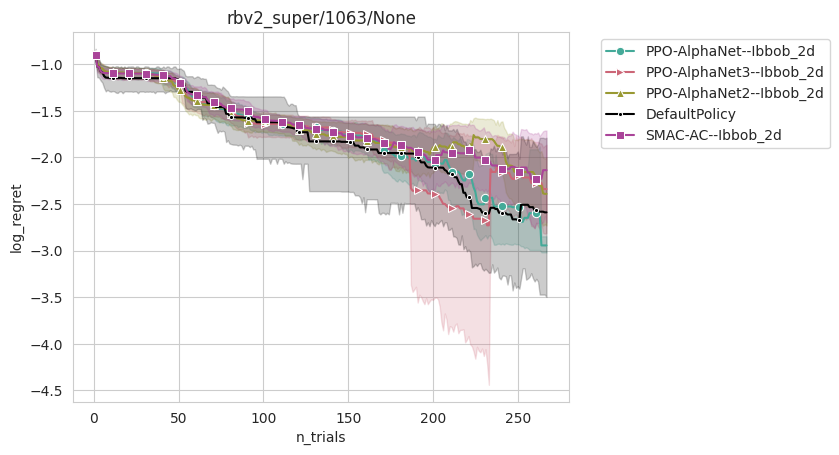

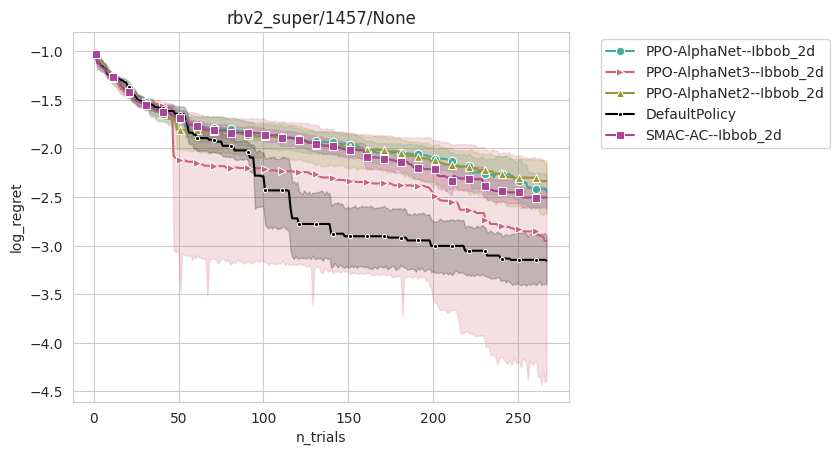

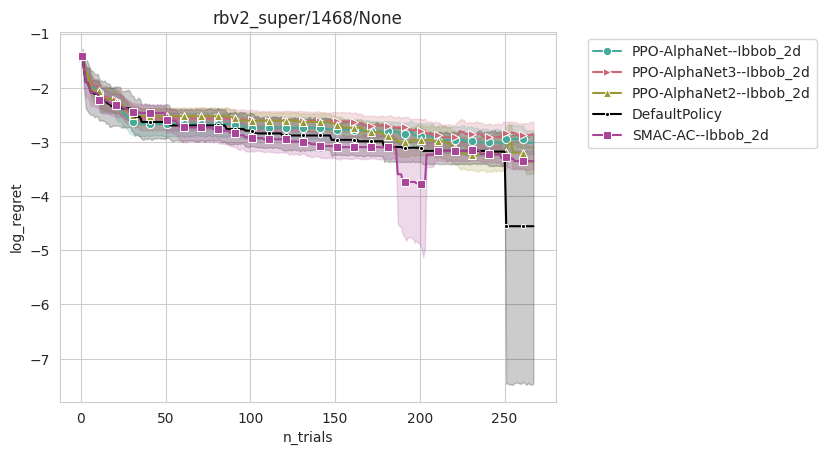

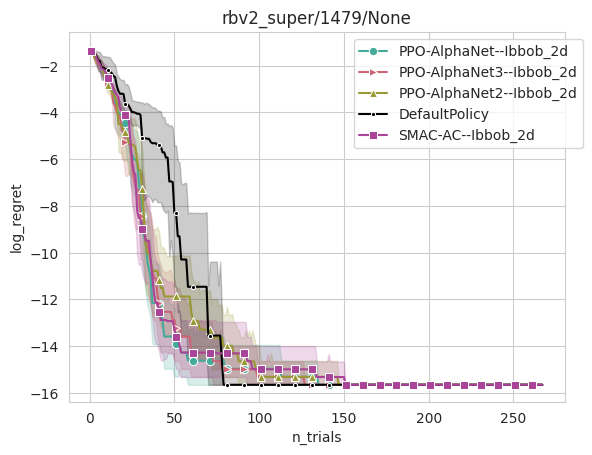

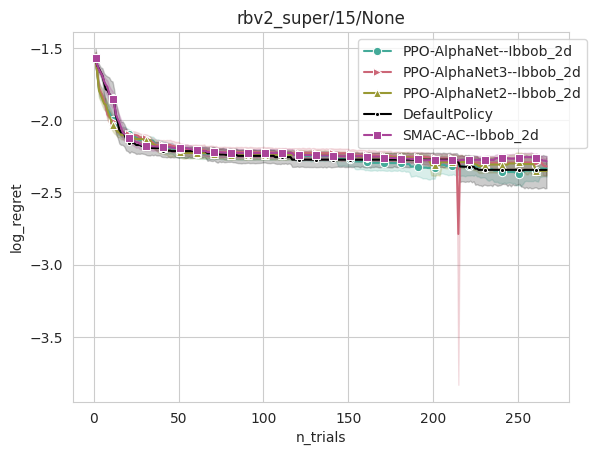

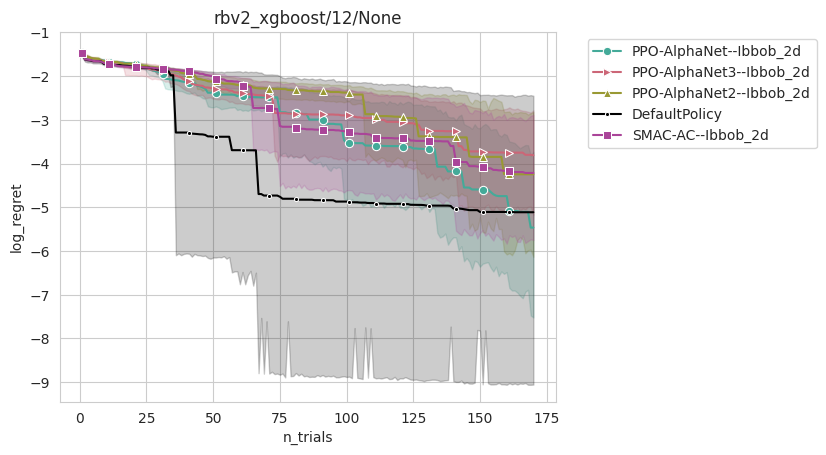

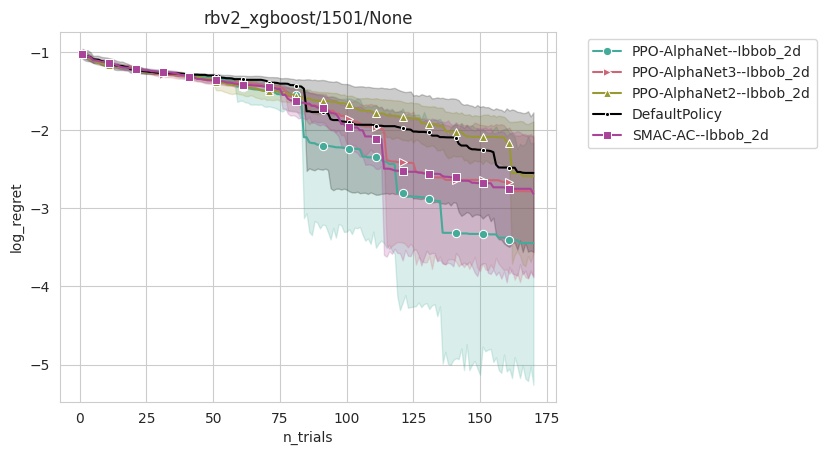

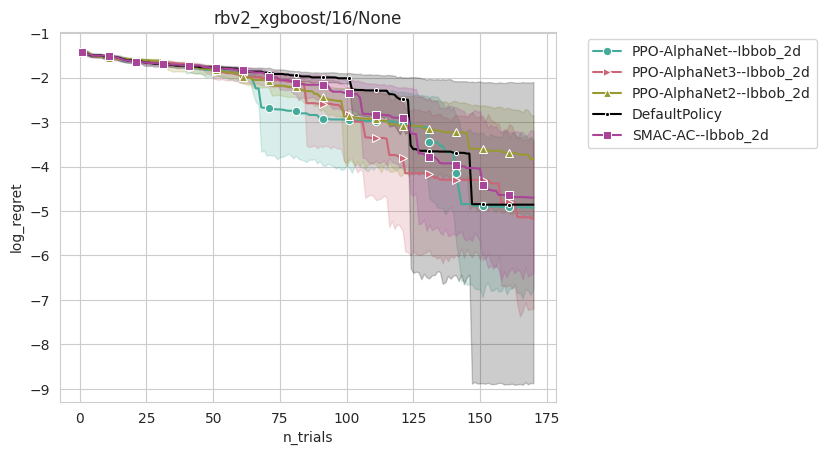

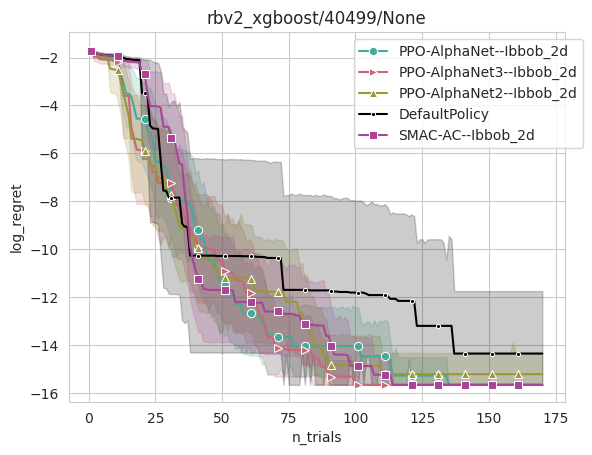

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn, get_color_palette, get_marker_palette
import pandas as pd

setup_seaborn()
%matplotlib inline

key_performance = "log_regret"
# key_performance = "trial_value__cost_inc"

logs = pd.read_parquet("logs.parquet")
# print(logs["optimizer_id"].unique())
logs = logs[
    (logs["optimizer_id"].str.startswith("PPO-AlphaNet")) \
        | (logs["optimizer_id"].str.startswith("Default")) \
        | (logs["optimizer_id"].str.startswith("SMAC-AC--")) \
        | (logs["optimizer_id"].str.startswith("PPO-24")) \
        | (logs["optimizer_id"].str.startswith("PPO-fid8")) \
        | (logs["optimizer_id"].str.startswith("SMAC-AC--24")) \
        | (logs["optimizer_id"].str.startswith("SMAC-AC--fid8"))
    ]
# logs = logs[logs["optimizer_id"].str.startswith("SMAC-AC--")]
logs = logs[~logs["optimizer_id"].str.contains("Ssmart")]
logs["optimizer_id"] = logs["optimizer_id"].map(lambda x: x.replace("dacbo_Cepisode_length_scaled_plus_logregret_AWEI-cont_Ssawei_Repisode_finished_scaled_", ""))
# logs["optimizer_id_old"] = logs["optimizer_id"]
def reduce_opt_id(optimizer_id: str) -> str:
    prefixes = [
        "PPO-AlphaNet--dacbo_Cepisode_length_scaled_plus_logregret",
        "PPO-AlphaNet2--dacbo_Cepisode_length_scaled_plus_logregret",
        "PPO-AlphaNet3--dacbo_Cepisode_length_scaled_plus_logregret",
        "PPO-AlphaNet--dacbo_Csymlogregret",
        "PPO-AlphaNet2--dacbo_Csymlogregret",
        "PPO-AlphaNet3--dacbo_Csymlogregret",
        "SMAC-AC--"
    ]
    for prefix in prefixes:
        if optimizer_id.startswith(prefix):
            if "fid8" in optimizer_id:
                optimizer_id = f"{prefix}Ifid8"
            elif "bbob2d" in optimizer_id:
                optimizer_id = f"{prefix}Ibbob_2d"
            else:
                print(f"Sth is weird for {optimizer_id}")
            break
    optimizer_id = optimizer_id.replace(
        "dacbo_Cepisode_length_scaled_plus_logregret", "eplen").replace(
            "dacbo_Csymlogregret", "symlogregret"
        )
    return optimizer_id
        

logs["optimizer_id"] = logs["optimizer_id"].map(reduce_opt_id)

palette = get_color_palette(logs)
palette["DefaultPolicy"] = "black"
marker_palette = get_marker_palette(logs)
for task_id, group in logs.groupby("task_id"):
    if task_id.startswith("bbob/4"):
        continue
    # if not task_id.startswith("bbob"):
    #     continue
    ax = sns.lineplot(
        data=group, x="n_trials", y=key_performance, hue="optimizer_id", palette=palette, style="optimizer_id", dashes=False, markers=marker_palette, markevery=10)
    ax.legend(bbox_to_anchor=(1.05, 1))
    ax.set_title(task_id)
    plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
from adaptaf.utils import add_log_regret, postprocess_benchmarks

setup_seaborn()
%matplotlib inline

key_performance = "log_regret"
# key_performance = "trial_value__cost_inc"

def fix_ppo_optimizer_id(x: str) -> str:
    return x.replace("PPO-", "PPO--").replace("seeds-", "seeds--seed")

df_final = pd.read_parquet(df_final_fn)
df_final = df_final[~df_final["task_id"].str.startswith("bbob/4")]
ppo_ids = df_final["optimizer_id"].str.startswith("PPO")
df_final.loc[ppo_ids, "optimizer_id"] = df_final.loc[ppo_ids, "optimizer_id"].map(fix_ppo_optimizer_id)
df_final["optimizer_id"] = df_final["optimizer_id"].map(lambda x: x.replace(
    "dacbo_Cepisode_length_scaled_plus_logregret", "").replace(
        "Repisode_finished_scaled", ""
    ))
df_final["source_seed"] = df_final["optimizer_id"].map(lambda x: float(x.split("seed")[-1]) if "seed" in x else None)
# df_final["optimizer_id"] = df_final["optimizer_id"].map(lambda x: x.split("seed")[0] if "seed" in x else x)
# print(df_final["optimizer_id"].unique())

df_final_single = df_final[df_final["optimizer_id"].map(lambda x: any(c in x for c in ["Default", "Random", "SMAC3", "fid"]))]
# df_final_single = df_final_single[df_final_single["task_id"].str.startswith("bbob/2")]
ppo_ids = df_final_single["optimizer_id"].str.startswith("PPO")
# df_final_single["optimizer_id"] = df_final_single["optimizer_id"].map(lambda x: x.split("seed")[0] if "seed" in x else x)


for task_id, group in df_final_single.groupby("task_id"):
    try:
        fig = plt.figure(figsize=(12, 8))
        axes = fig.subplots(nrows=1, ncols=2, sharex=False, sharey=True)
        ax = axes[0]
        ax = sns.boxplot(data=group, x=key_performance, y="optimizer_id", hue="optimizer_id", ax=ax)
        ax = axes[1]
        default_mean = group.loc[group["optimizer_id"] == "DefaultPolicy", key_performance].mean()
        ax.axvline(default_mean)
        ax = sns.barplot(data=group, x=key_performance, y="optimizer_id", hue="optimizer_id", ax=ax)
        ax.set_title(task_id)
        plt.show()
    except Exception as e:
        print(task_id)
        print(e)
    # break